In [235]:
import pandas
data_imdb = pandas.read_json("data_afterprocessing_with_award.json")

In [236]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
df = data_imdb["genre"]
genre = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_14140\1296457492.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genre = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)
C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_14140\1296457492.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genre = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)
C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_14140\1296457492.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  genre = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)
C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_14140\1296457492.py:4: FutureWarning: The d

In [237]:
len(genre.columns.to_list())

27

In [4]:
data_imdb_lan = data_imdb[~data_imdb["original_language"].isna()]

In [238]:
df = data_imdb.groupby('original_language').size().reset_index(name='counts')


In [239]:
df = df[df['counts']>10].sort_values(by="counts")

In [241]:
df.count()

original_language    24
counts               24
dtype: int64

In [7]:
list_language = list(df["original_language"])

In [16]:
list_language

['Swedish',
 'Polish',
 'Unknownlanguage',
 'Dutch',
 'Malayalam',
 'Danish',
 'Persian',
 'Tamil',
 'Norwegian',
 'Hebrew',
 'Russian',
 'Arabic',
 'Telugu',
 'Portuguese',
 'Filipino',
 'Italian',
 'German',
 'Japanese',
 'Korean',
 'Spanish',
 'Chinese',
 'Hindi',
 'French',
 'English']

In [8]:
for i in data_imdb.index:
    if data_imdb["original_language"][i] not in list_language:
        data_imdb["original_language"][i]  = 'Unknownlanguage'


/tmp/ipykernel_4621/2836099780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imdb["original_language"][i]  = 'Unknownlanguage'


In [9]:
df = data_imdb.groupby('original_language').size().reset_index(name='counts')


In [19]:
df

,original_language,counts
0,Arabic,25
1,Chinese,150
2,Danish,16
3,Dutch,14
4,English,3986
5,Filipino,32
6,French,259
7,German,58
8,Hebrew,22
9,Hindi,177


In [10]:
df1 = pd.get_dummies(data_imdb["original_language"])


In [80]:
df1 = pd.get_dummies(data_imdb["theater_release_month"])


In [76]:
df1 = pd.get_dummies(data_imdb["year"])


In [77]:
df1

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,0,0,0,0,0,0,0,0,0,0,0,0,1
5466,0,0,0,0,0,0,0,0,0,1,0,0,0
5467,0,0,0,0,0,0,0,0,0,0,0,1,0
5468,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
rotentomatoes_update = pd.read_json("rottentomatoes_update.json")

In [12]:
rotentomatoes_update.count()

imdb_title                6412
imdb_id                   6412
tomatometer_score         6402
audience_score            6402
tomatometer_number        6402
audience_number           6402
rate                      2993
genre                     6306
original_language         6253
theater_release_date      4230
streaming_release_date    5280
runtime                   6210
distributor               4074
cast                      6041
dtype: int64

In [13]:
rotentomatoes_update = rotentomatoes_update[["distributor","imdb_title","rate"]]

In [49]:
rotentomatoes_update.count()

distributor    4074
imdb_title     6412
rate           2993
dtype: int64

In [17]:
distribtutor = imdb[~imdb["distributor"].isna()]

In [51]:
for i in distribtutor.index:
    rotentomatoes_update["distributor"][i] = [j.strip().replace(",","").lower() for j in rotentomatoes_update["distributor"][i].strip().split(",")]
    print(rotentomatoes_update["distributor"][i])


['warner bros.', 'warner home vídeo']
['cmc pictures']
['ammo content']
['distrib films']
['s2bn films']
['first run']
['reliance entertainment']
['cmc pictures']
['cnn films', 'radius twc']
['20th century fox']
['samuel goldwyn films']
['neon']
['lionsgate films']
['bleecker street media', 'fingerprint releasing']
['20th century fox']
['entertainment studios motion pictures']
['universal pictures']
['lionsgate films']
['weinstein co.']
['20th century fox']
['20th century fox']
['roadside attractions', 'ld entertainment']
['walt disney']
['paramount pictures']
['warner bros. pictures']
['sony pictures entertainment', 'columbia pictures']
['20th century fox']
['20th century fox']
['warner bros. pictures']
['universal studios']
['lionsgate films']
['focus features']
['sony pictures entertainment']
['sony pictures']
['universal pictures']
['warner bros. pictures']
['cbs films']
['lionsgate films']
['fox searchlight']
['sony pictures entertainment']
['universal pictures']
['sony pictures e

In [19]:
distributor_list = []
for i in distribtutor.index:
    distributor_list = distributor_list + imdb["distributor"][i] 


In [56]:
rate = rotentomatoes_update[~rotentomatoes_update["rate"].isna()]

In [58]:
for i in rate.index:
    rotentomatoes_update["rate"][i] = rotentomatoes_update["rate"][i].strip().split(" ")[0]
    print(rotentomatoes_update["rate"][i])

R
TVG
PG-13
PG-13
PG-13
PG-13
PG
R
PG-13
PG
R
PG
PG-13
PG
PG-13
PG
PG-13
R
R
PG-13
R
R
PG-13
PG-13
PG-13
PG-13
PG-13
PG-13
R
PG-13
PG
PG-13
PG
R
R
PG-13
R
R
PG-13
PG-13
R
PG-13
R
PG
PG-13
PG-13
R
PG-13
R
R
R
PG-13
PG-13
PG-13
R
PG-13
PG
PG-13
R
R
PG-13
PG-13
PG-13
R
R
PG-13
PG-13
R
PG-13
PG
R
PG-13
R
PG
PG-13
PG-13
PG-13
PG-13
PG
R
PG-13
R
PG-13
R
R
PG-13
PG-13
PG-13
R
PG-13
PG
R
R
R
R
R
R
PG-13
R
PG-13
PG-13
PG
PG-13
R
PG
PG-13
PG-13
PG
PG-13
R
PG
R
R
PG-13
R
PG-13
PG-13
PG
R
R
PG
R
R
R
PG-13
PG
TV14
PG-13
PG-13
PG-13
PG-13
PG-13
PG-13
PG
R
R
PG
PG-13
R
PG-13
R
PG-13
R
R
G
PG
PG
R
PG-13
R
R
PG
PG-13
PG
R
PG
PG-13
TV14
PG-13
PG
R
PG
R
PG-13
PG
R
R
PG-13
PG
PG-13
PG-13
PG-13
R
PG-13
R
PG
PG-13
PG-13
PG
PG-13
PG
PG-13
PG-13
R
R
PG-13
PG-13
PG-13
R
R
R
PG
PG-13
R
PG-13
PG-13
R
PG-13
PG-13
PG
R
R
R
PG
PG-13
PG-13
PG
R
TV14
R
TV14
PG
R
PG-13
PG-13
R
R
PG-13
PG
R
R
PG
R
PG-13
PG
PG
PG-13
PG-13
PG-13
R
PG
PG-13
PG-13
PG
PG
PG-13
PG-13
PG-13
PG-13
R
PG-13
PG-13
R
R
R
PG-13
PG-13
PG-13
PG
PG-13

In [61]:
rate_list = []
for i in rate.index:
    rate_list.append(rotentomatoes_update["rate"][i])



In [62]:
set(rate_list)

{'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV14', 'TVG', 'TVMA', 'TVPG', 'TVY'}

In [55]:
print(len(set(distributor_list)))

487


In [64]:
imdb = pandas.merge(data_imdb,rotentomatoes_update, left_on='title', right_on='imdb_title',validate="one_to_one")

In [14]:
imdb = pandas.read_json("data_dummies.json")
imdb.count()

title                             5470
number_nominated_best_actress     5470
number_nominated_best_actor       5470
number_nominated_best_director    5470
number_best_actress               5470
                                  ... 
Sports                            5410
Sports&fitness                    5410
Stand-up                          5410
War                               5410
Western                           5410
Length: 119, dtype: int64

In [67]:
data_imdb.count()

title                             5470
number_nominated_best_actress     5470
number_nominated_best_actor       5470
number_nominated_best_director    5470
number_best_actress               5470
number_best_actor                 5470
number_best_director              5470
number                            5470
directors                         5470
box_office_gross                  5470
imdb_rating                       5465
plot_description                  5105
budget                            2698
gross_us_canada                   5128
opening_weekend_us_canada         4893
gross_worldwide                   5234
imdb_title                        5470
imdb_id                           5470
tomatometer_score                 4189
audience_score                    4545
tomatometer_number                5468
audience_number                   5468
genre                             5410
original_language                 5470
streaming_release_date            4729
runtime                  

In [68]:
df1 = pd.get_dummies(imdb["rate"])


In [69]:
df1

,G,NC-17,PG,PG-13,R,TV14,TVG,TVMA,TVPG
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5465,0,0,0,1,0,0,0,0,0
5466,0,0,0,0,1,0,0,0,0
5467,0,0,0,0,0,0,0,0,0
5468,0,0,0,0,0,0,0,0,0


In [88]:
imdb = pd.concat([imdb, genre], axis=1)


In [98]:
imdb["distributor"].count()

3892

In [90]:
print(imdb.columns.tolist())

['title', 'number_nominated_best_actress', 'number_nominated_best_actor', 'number_nominated_best_director', 'number_best_actress', 'number_best_actor', 'number_best_director', 'number', 'directors', 'box_office_gross', 'imdb_rating', 'plot_description', 'budget', 'gross_us_canada', 'opening_weekend_us_canada', 'gross_worldwide', 'imdb_title_x', 'imdb_id', 'tomatometer_score', 'audience_score', 'tomatometer_number', 'audience_number', 'genre', 'original_language', 'streaming_release_date', 'runtime', 'cast', 'theater_release_date', 'imdb_link', 'year', 'theater_release_month', 'distributor', 'imdb_title_y', 'rate', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV14', 'TVG', 'TVMA', 'TVPG', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Filipino', 'French', 'German', 'Hebrew', 'Hindi', 'Italian', 'Japanese', 'Korean', 'Malayalam', 'No

In [92]:
imdb.to_json("data_dummies.json",orient="records")

In [93]:
distributor_list = set(distributor_list)

In [20]:
distributor_list

['20th century fox',
 '20th century fox',
 'warner bros. pictures',
 'universal studios',
 'paramount pictures',
 'sony pictures entertainment',
 'columbia pictures',
 'sony pictures',
 'lionsgate films',
 'focus features',
 'walt disney',
 'walt disney',
 'lionsgate films',
 'lionsgate films',
 'cbs films',
 'warner bros. pictures',
 'warner bros. pictures',
 'universal pictures',
 '20th century fox',
 '20th century fox',
 'summit entertainment',
 'lions gate entertainment',
 'summit entertainment',
 'warner bros. pictures',
 'warner bros. pictures',
 'universal pictures',
 'sony pictures entertainment',
 'universal pictures',
 'walt disney',
 '20th century fox',
 'universal pictures',
 'metro-goldwyn-mayer',
 'stx films',
 'lionsgate films',
 'fork films',
 'universal pictures',
 'warner bros. pictures',
 'sony pictures entertainment',
 'columbia pictures',
 '20th century fox',
 'lionsgate films',
 'cbs films',
 'focus features',
 'warner bros. pictures',
 'warner bros. pictures',
 '

In [62]:
count_distributors = {}
for j in distributor_list:
    count_distributors[j] = {
        "count":0,
        "total_revenue":0
    }

In [63]:
distribtutor = imdb[~imdb["distributor"].isna()]
for i in distribtutor.index:
    print(imdb["distributor"][i])
    for j in imdb["distributor"][i]:

        count_distributors[j]["count"]+=1
        count_distributors[j]["total_revenue"]+=imdb["gross_worldwide"][i]


['20th century fox']
['20th century fox']
['warner bros. pictures']
['universal studios']
['paramount pictures']
['sony pictures entertainment', 'columbia pictures']
['sony pictures']
['lionsgate films']
['focus features']
['walt disney']
['walt disney']
['lionsgate films']
['lionsgate films', 'cbs films']
['warner bros. pictures']
['warner bros. pictures']
['universal pictures']
['20th century fox']
['20th century fox']
['summit entertainment']
['lions gate entertainment']
['summit entertainment']
['warner bros. pictures']
['warner bros. pictures']
['universal pictures']
['sony pictures entertainment']
['universal pictures']
['walt disney']
['20th century fox']
['universal pictures']
['metro-goldwyn-mayer']
['stx films']
['lionsgate films']
['fork films']
['universal pictures']
['warner bros. pictures']
['sony pictures entertainment', 'columbia pictures']
['20th century fox']
['lionsgate films', 'cbs films']
['focus features']
['warner bros. pictures']
['warner bros. pictures']
['stx 

In [64]:
print(count_distributors["ifc films"])
18458000318/97

{'count': 195, 'total_revenue': 643357889}


190288663.07216495

In [126]:
list_distributors_most = []
for i in count_distributors.keys():
    if  count_distributors[i]["count"]>=20:
        list_distributors_most.append(i)
print(len(list_distributors_most))

50


In [66]:
list_distributors_most = {}
for i in count_distributors.keys():
    if  count_distributors[i]["count"]>=90:
        list_distributors_most[i] = count_distributors[i]["count"]
print(len(list_distributors_most))

11


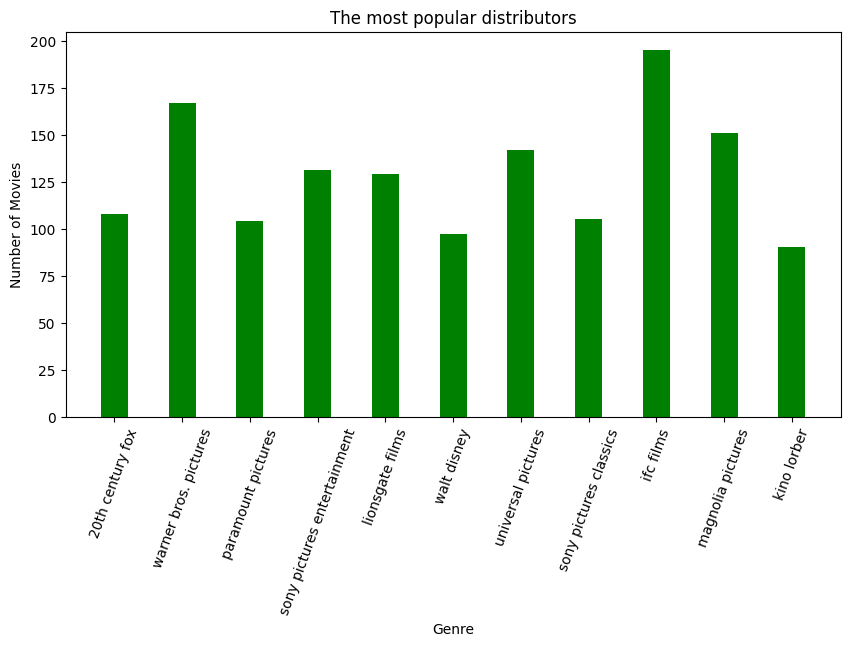

In [67]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = list_distributors_most
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Genre")
plt.xticks(rotation =70)
plt.ylabel("Number of Movies")
plt.title("The most popular distributors")
plt.show()

In [69]:
list_distributors_most = {}
for i in count_distributors.keys():
    if  count_distributors[i]["count"]>=90:
        list_distributors_most[i] = count_distributors[i]["total_revenue"]/count_distributors[i]["count"]
print(len(list_distributors_most))

11


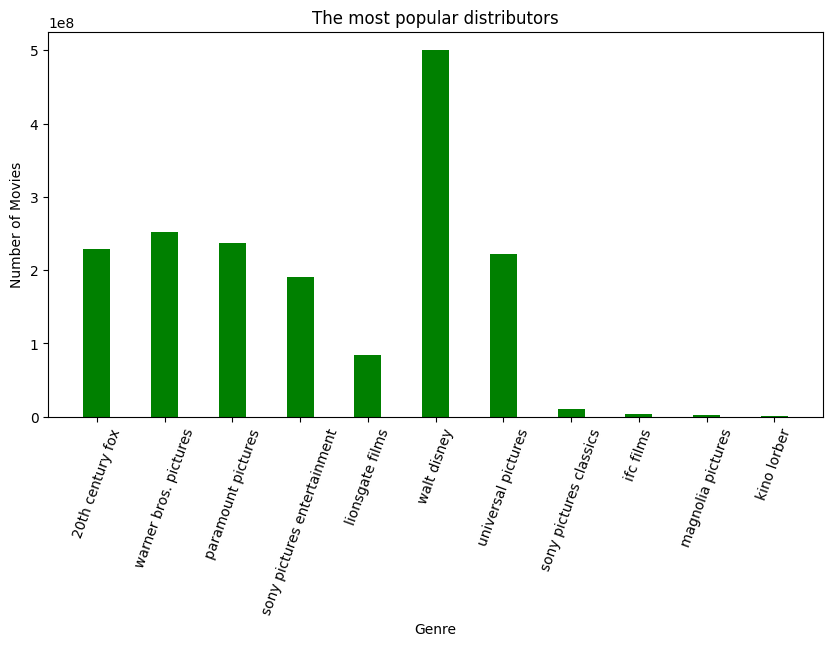

In [70]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = list_distributors_most
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Genre")
plt.xticks(rotation =70)
plt.ylabel("Number of Movies")
plt.title("The most popular distributors")
plt.show()

In [ ]:
count_genre = {}
for j in genre_list:
    count_genre[j] = {
        "count":0,
        "total_revenue":0
    }

In [48]:
genres = imdb[~imdb["genre"].isna()]
genre_list = []
for i in genres.index:
    genre_list = genre_list+imdb["genre"][i]
genre_list = set(genre_list)
count_genre = {}
for j in genre_list:
    count_genre[j] = {
        "count":0,
        "total_revenue":0
    }
for i in genres.index:
    print(imdb["genre"][i])
    for j in imdb["genre"][i]:
        count_genre[j]["count"]+=1
        count_genre[j]["total_revenue"]+=imdb["gross_worldwide"][i]


['Adventure', 'Drama']
['Romance', 'Drama']
['Drama', 'Biography']
['War', 'Drama']
['Kids&family', 'Comedy', 'Adventure', 'Animation']
['Horror', 'Crime', 'Drama']
['Documentary']
['Kids&family', 'Holiday', 'Comedy', 'Action', 'Animation']
['Comedy', 'Horror', 'Action']
['Action', 'Mystery&thriller']
['Holiday', 'Comedy', 'Adventure']
['Comedy']
['Sci-fi', 'Action', 'Adventure']
['Kids&family', 'Holiday', 'Fantasy', 'Adventure']
['Comedy']
['Romance', 'Drama']
['War', 'Drama']
['Crime', 'Drama', 'Action']
['Action', 'Mystery&thriller', 'War']
['Comedy']
['Comedy', 'Adventure', 'Action']
['Comedy', 'Drama']
['Drama', 'Romance']
['Action']
['Drama', 'Romance', 'Musical']
['Holiday', 'Comedy']
['Kids&family', 'Fantasy', 'Adventure', 'Action']
['Horror', 'Mystery&thriller']
['Horror']
['Holiday', 'Romance', 'Comedy']
['Kids&family', 'Fantasy', 'Animation']
['Comedy', 'Sci-fi']
['Mystery&thriller']
['Comedy']
['Action', 'Mystery&thriller']
['Mystery&thriller']
['Comedy']
['Documentary']
['

In [54]:
list_genre_most = {}
for i in count_genre.keys():
    if  count_genre[i]["count"]>=500:
        list_genre_most[i]=int(count_genre[i]["total_revenue"]/count_genre[i]["count"])
print(list_genre_most)

{'Drama': 27741594, 'Documentary': 4835113, 'Action': 181470013, 'Comedy': 75252938, 'Romance': 40598585, 'Adventure': 277994630, 'Mystery&thriller': 55153627}


In [56]:
list_genre_most = {}
for i in count_genre.keys():
    if  count_genre[i]["count"]>=500:
        list_genre_most[i]=count_genre[i]["count"]
print(list_genre_most)

{'Drama': 2449, 'Documentary': 1006, 'Action': 747, 'Comedy': 1410, 'Romance': 512, 'Adventure': 597, 'Mystery&thriller': 941}


In [50]:
print(count_genre)

{'Anime': {'count': 43, 'total_revenue': 2275383711}, 'Sports&fitness': {'count': 3, 'total_revenue': 14475058}, 'Holiday': {'count': 55, 'total_revenue': 4077129460}, 'Musical': {'count': 77, 'total_revenue': 14208986609}, 'Drama': {'count': 2449, 'total_revenue': 67939166039}, 'Biography': {'count': 290, 'total_revenue': 8352208708}, 'Documentary': {'count': 1006, 'total_revenue': 4864123800}, 'Music': {'count': 127, 'total_revenue': 1963359931}, 'Fantasy': {'count': 349, 'total_revenue': 98844740983}, 'Action': {'count': 747, 'total_revenue': 135558100232}, 'Comedy': {'count': 1410, 'total_revenue': 106106643722}, 'Sci-fi': {'count': 243, 'total_revenue': 56519052271}, 'Romance': {'count': 512, 'total_revenue': 20786475696}, 'Entertainment': {'count': 1, 'total_revenue': 1266115964}, 'Kids&family': {'count': 223, 'total_revenue': 56957856609}, 'Western': {'count': 42, 'total_revenue': 2218432323}, 'Adventure': {'count': 597, 'total_revenue': 165962794419}, 'History': {'count': 285, 

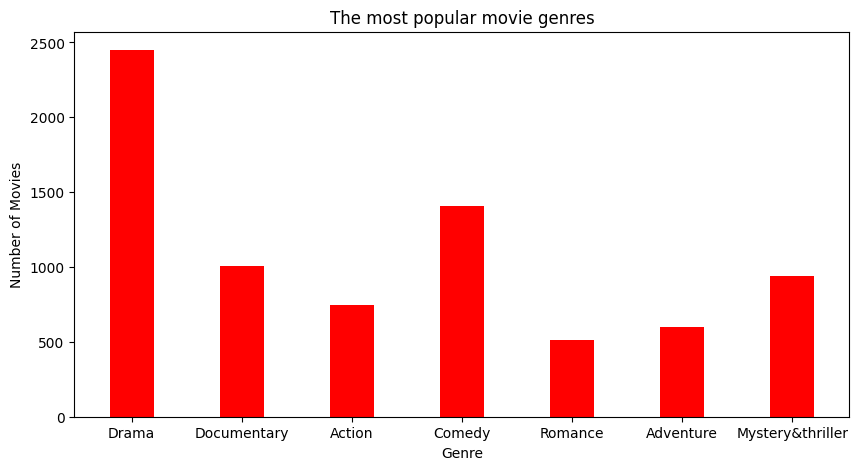

In [57]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = list_genre_most
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("The most popular movie genres")
plt.show()

In [72]:
imdb.sort_values(by="gross_worldwide",ascending = False).head(10)[["title","gross_worldwide","distributor"]]

,title,gross_worldwide,distributor
752,Avengers: Endgame,2799439100,[walt disney]
753,Star Wars: Episode VII - The Force Awakens,2071310218,[walt disney]
750,Avengers: Infinity War,2052415039,[walt disney]
756,Spider-Man: No Way Home,1921847111,[columbia pictures]
746,The Lion King,1663075401,[walt disney]
749,The Avengers,1520538536,[warner bros. pictures]
717,Furious 7,1515341399,[universal pictures]
4830,Top Gun: Maverick,1488732821,[paramount pictures]
741,Frozen II,1453683476,[walt disney]
740,Avengers: Age of Ultron,1405018048,[walt disney]


In [76]:
imdb.sort_values(by="budget",ascending = False).head(10)[["title","budget","gross_worldwide","distributor"]]


,title,budget,gross_worldwide,distributor
752,Avengers: Endgame,356000000.0,2799439100,[walt disney]
750,Avengers: Infinity War,321000000.0,2052415039,[walt disney]
748,Star Wars: Episode VIII - The Last Jedi,317000000.0,1334407706,[walt disney]
551,Justice League,300000000.0,657926987,None
705,Solo: A Star Wars Story,275000000.0,392924807,[walt disney]
746,The Lion King,260000000.0,1663075401,[walt disney]
690,Tangled,260000000.0,592462816,[walt disney]
561,Pirates of the Caribbean: On Stranger Tides,250000000.0,1046721266,[walt disney]
737,The Dark Knight Rises,250000000.0,1081169825,[warner bros. pictures]
547,The Fate of the Furious,250000000.0,1236005118,[universal pictures]


In [46]:
import seaborn as sns
for index,row in imdb.iterrows():
    try:
        imdb["gross_worldwide"][index] = int(row["gross_worldwide"].replace(",","").replace("$",""))
    except:
        imdb["gross_worldwide"][index] = row["box_office_gross"]


/tmp/ipykernel_4621/380348843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["gross_worldwide"][index] = int(row["gross_worldwide"].replace(",","").replace("$",""))
/tmp/ipykernel_4621/380348843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["gross_worldwide"][index] = row["box_office_gross"]


gross_worldwide                     int64
budget                            float64
number_nominated_best_actress       int64
number_nominated_best_actor         int64
number_nominated_best_director      int64
number_best_actress                 int64
number_best_actor                   int64
number_best_director                int64
runtime                           float64
dtype: object
Index(['gross_worldwide', 'budget', 'number_nominated_best_actress',
       'number_nominated_best_actor', 'number_nominated_best_director',
       'number_best_actress', 'number_best_actor', 'number_best_director',
       'runtime'],
      dtype='object')


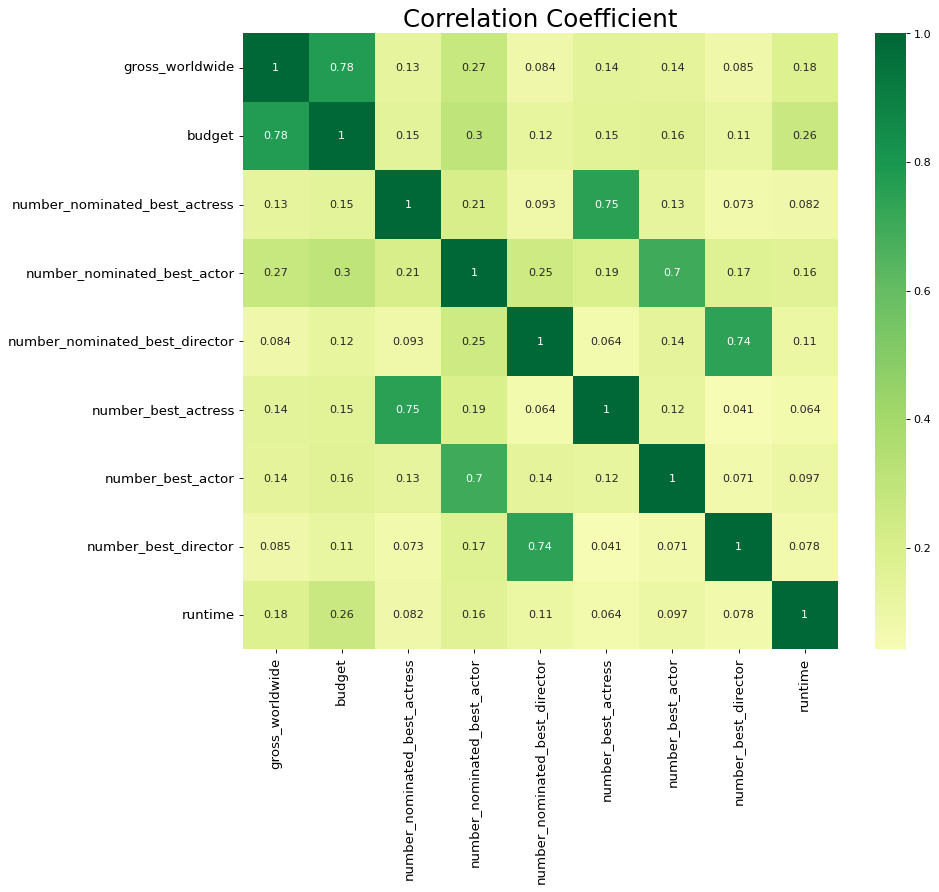

In [124]:
# https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
#bieu do the hien he so tuong quan giua cac cap bien so thuc
imdb["gross_worldwide"] = pandas.to_numeric(imdb["gross_worldwide"])
imdb_new = imdb[["gross_worldwide","budget",'number_nominated_best_actress', 'number_nominated_best_actor', 'number_nominated_best_director', 'number_best_actress', 'number_best_actor', 'number_best_director',"runtime"]]
print(imdb_new.dtypes)
print(imdb_new.corr().columns)
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(imdb_new.corr(), xticklabels=imdb_new.corr().columns, yticklabels=imdb_new.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlation Coefficient', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

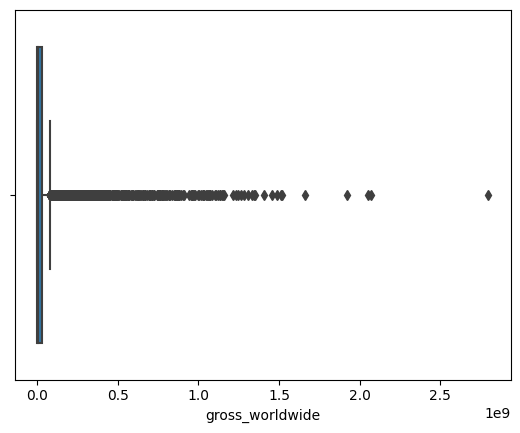

In [88]:
imdb_rating_plot  =  sns.boxplot(x = imdb['gross_worldwide'])
fig = imdb_rating_plot.get_figure()
fig.savefig("gross_worldwide.png") 

In [90]:
df = imdb.groupby('year').size().reset_index(name='counts')


In [91]:
df

,year,counts
0,2010,453
1,2011,518
2,2012,523
3,2013,568
4,2014,511
5,2015,538
6,2016,576
7,2017,559
8,2018,593
9,2019,280


In [92]:
years = {}
for i in df.index:
    years[df["year"][i]] = df["counts"][i]

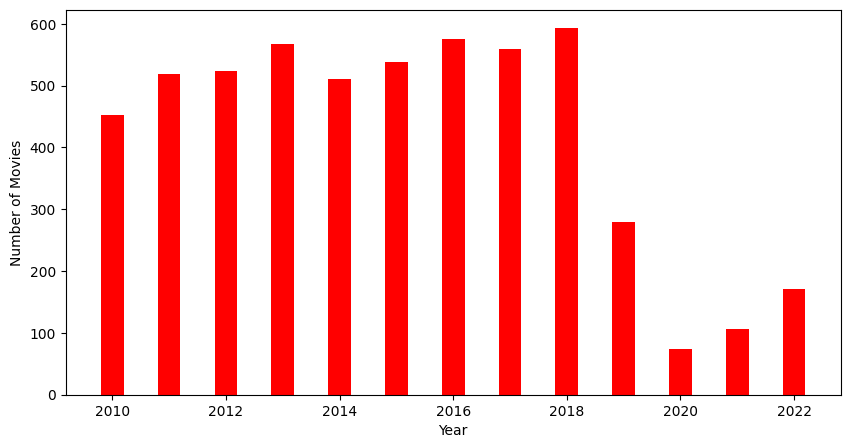

In [93]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = years
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

In [108]:
df = imdb.groupby('year')["gross_worldwide"].mean().reset_index(name='gross_worldwide_mean')


In [111]:
df = imdb.groupby('year')["gross_worldwide"].sum().reset_index(name='gross_worldwide_sum')


In [112]:
years = {}
for i in df.index:
    years[df["year"][i]] = df["gross_worldwide_sum"][i]

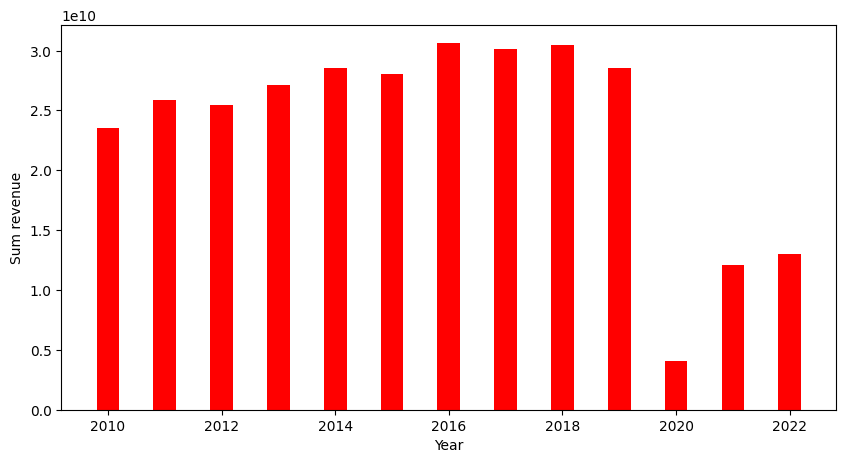

In [113]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = years
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Sum revenue")
plt.show()

In [94]:
df = imdb.groupby('theater_release_month').size().reset_index(name='counts')


In [98]:
months = {
    "Jan":0,"Feb":0,"Mar":0,"Apr":0,"May":0,"Jun":0,"Jul":0,"Aug":0,"Sep":0,"Oct":0,"Nov":0,"Dec":0
}
for i in df.index:
    months[df["theater_release_month"][i]] = df["counts"][i]

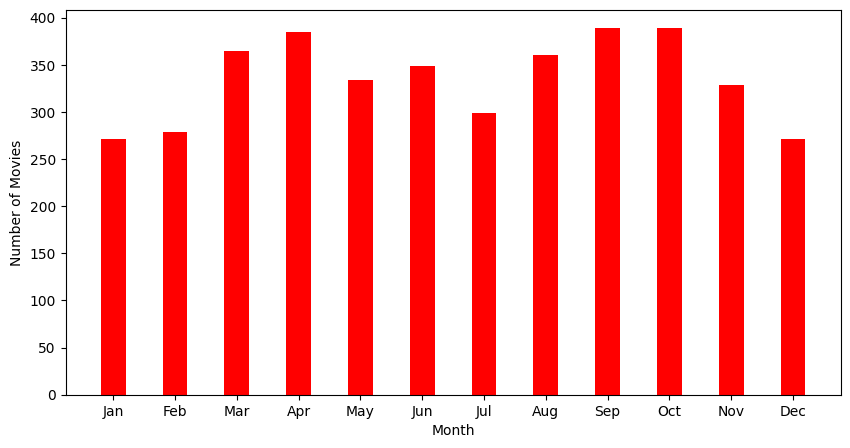

In [99]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = months
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Number of Movies")
plt.show()

In [101]:
df = imdb.groupby('rate').size().reset_index(name='counts')


In [100]:
imdb.to_json("data_dummies2.json",orient="records")

In [102]:
rates = {}
for i in df.index:
    rates[df["rate"][i]] = df["counts"][i]

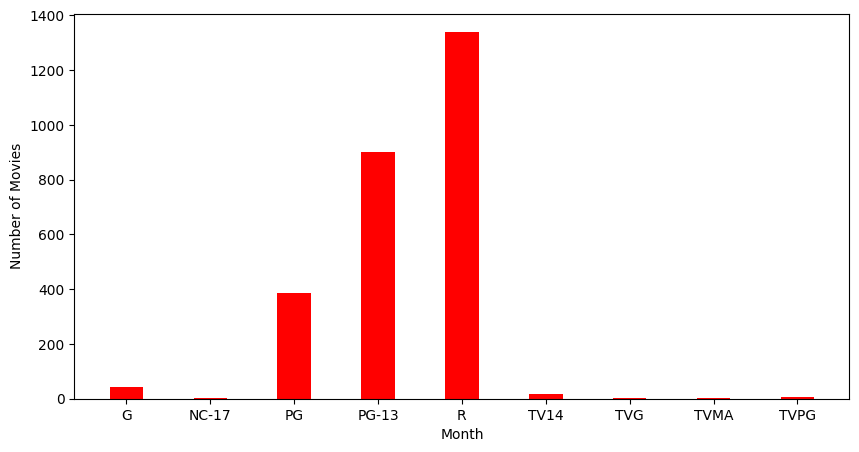

In [103]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = rates
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Rate")
plt.ylabel("Number of Movies")
plt.show()

In [104]:
df = imdb.groupby('rate')["gross_worldwide"].mean().reset_index(name='gross_worldwide_mean')


In [105]:
df

,rate,gross_worldwide_mean
0,G,1.521774e+08
1,NC-17,1.060335e+07
2,PG,1.442082e+08
3,PG-13,1.495384e+08
4,R,4.051218e+07
5,TV14,1.450716e+08
6,TVG,1.501152e+06
7,TVMA,1.909020e+06
8,TVPG,2.611215e+08


In [106]:
rates = {}
for i in df.index:
    rates[df["rate"][i]] = df["gross_worldwide_mean"][i]

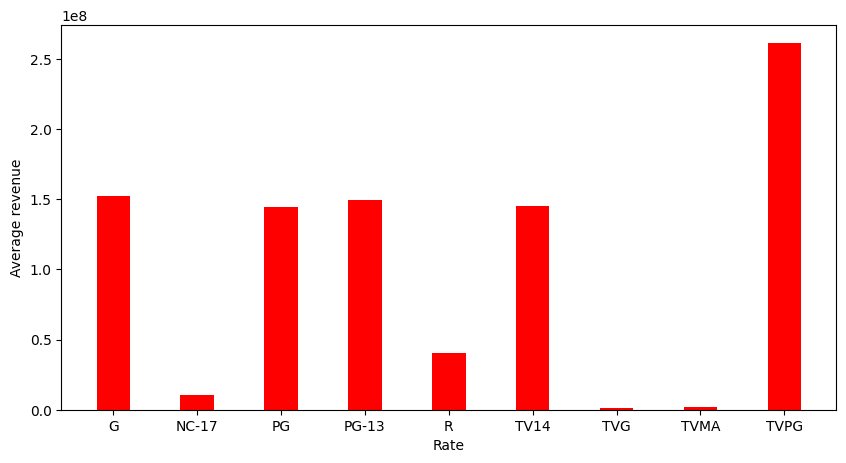

In [107]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = rates
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Rate")
plt.ylabel("Average revenue")
plt.show()

In [116]:
df = imdb.groupby('original_language').size().reset_index(name='counts')


In [117]:
rates = {}
for i in df.index:
    rates[df["original_language"][i]] = df["counts"][i]

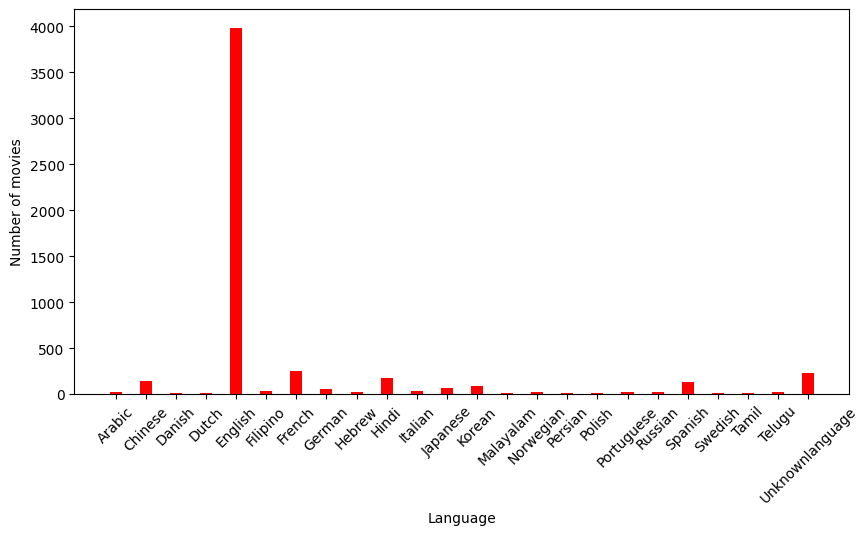

In [119]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = rates
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Language")
plt.xticks(rotation = 45)
plt.ylabel("Number of movies")
plt.show()

In [120]:
df = imdb.groupby('original_language')["gross_worldwide"].mean().reset_index(name='revenue_mean')


In [122]:
rates = {}
for i in df.index:
    rates[df["original_language"][i]] = df["revenue_mean"][i]

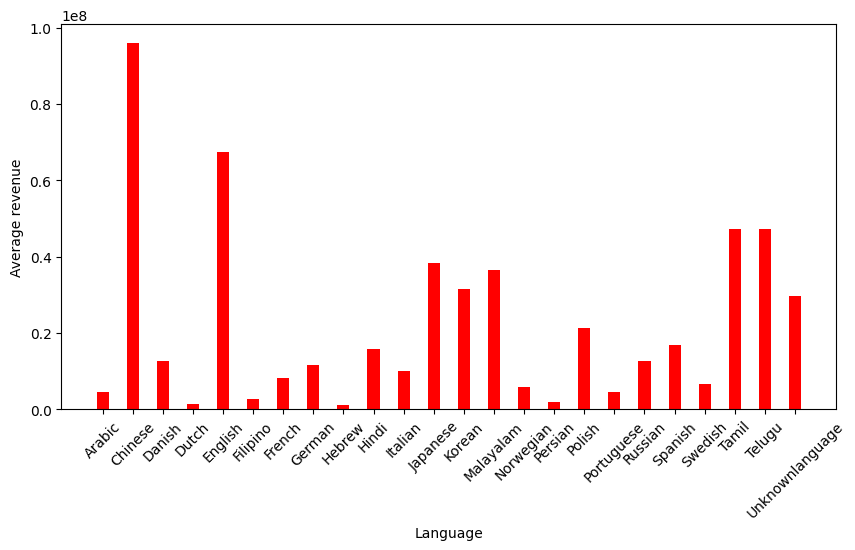

In [123]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = rates
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)
 
plt.xlabel("Language")
plt.xticks(rotation = 45)
plt.ylabel("Average revenue")
plt.show()

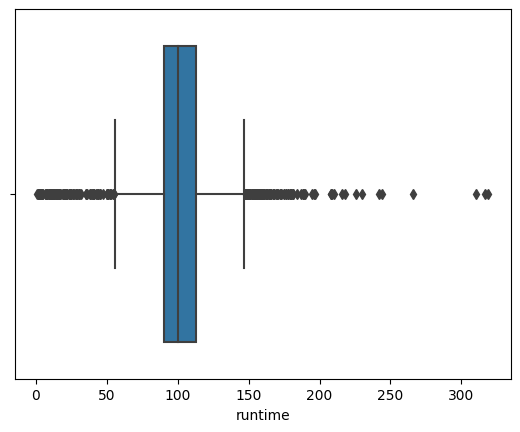

In [125]:
imdb_rating_plot  =  sns.boxplot(x = imdb['runtime'])
fig = imdb_rating_plot.get_figure()
fig.savefig("runtime.png") 

In [127]:
distributors= imdb[~imdb.distributor.isna()]

In [128]:
for i in distributors.index:
    m = []
    for j in imdb["distributor"][i]:
        if j in list_distributors_most:
            m.append(j)
    
    imdb["distributor"][i] = m

/tmp/ipykernel_4621/2654250315.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb["distributor"][i] = m


In [130]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
df = imdb["distributor"]
distributors = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)

/tmp/ipykernel_4621/3632366374.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distributors = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)
/tmp/ipykernel_4621/3632366374.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distributors = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)
/tmp/ipykernel_4621/3632366374.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distributors = pd.get_dummies(df.apply(pd.Series).stack()).sum(level=0)
/tmp/ipykernel_4621/3632366374.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence 

In [131]:
distributors

,20th century fox,a24,abramorama,amazon studios,bleecker street media,cbs films,china lion film distribution,cinema guild,cohen media group,columbia pictures,...,summit entertainment,the orchard,universal pictures,utv motion pictures,variance films,vertical entertainment,walt disney,warner bros. pictures,weinstein co.,well go usa
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5465,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [134]:
print(len(distributors.columns.tolist()))

50


In [135]:
imdb = pd.concat([imdb, distributors], axis=1)


In [137]:
print(imdb.columns.tolist())

['title', 'number_nominated_best_actress', 'number_nominated_best_actor', 'number_nominated_best_director', 'number_best_actress', 'number_best_actor', 'number_best_director', 'number', 'directors', 'box_office_gross', 'imdb_rating', 'plot_description', 'budget', 'gross_us_canada', 'opening_weekend_us_canada', 'gross_worldwide', 'imdb_title_x', 'imdb_id', 'tomatometer_score', 'audience_score', 'tomatometer_number', 'audience_number', 'genre', 'original_language', 'streaming_release_date', 'runtime', 'cast', 'theater_release_date', 'imdb_link', 'year', 'theater_release_month', 'distributor', 'imdb_title_y', 'rate', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV14', 'TVG', 'TVMA', 'TVPG', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Filipino', 'French', 'German', 'Hebrew', 'Hindi', 'Italian', 'Japanese', 

In [2]:
imdb.to_json("data_dummies3.json",orient="records")

NameError: name 'imdb' is not defined

In [100]:
import pandas

imdb = pandas.read_json("data_dummies3.json")

In [101]:
imdb = imdb.drop(['title','number',"gross_us_canada","opening_weekend_us_canada","box_office_gross",'directors','genre','original_language','streaming_release_date','cast','theater_release_date','imdb_link','year',"theater_release_month",'distributor','imdb_title_y','imdb_title_x','imdb_rating', 'tomatometer_score', 'audience_score', 'tomatometer_number', 'audience_number','imdb_title_x','imdb_title_y','plot_description','imdb_id','rate'],axis=1)

In [102]:

print(imdb.columns.tolist())

['number_nominated_best_actress', 'number_nominated_best_actor', 'number_nominated_best_director', 'number_best_actress', 'number_best_actor', 'number_best_director', 'budget', 'gross_worldwide', 'runtime', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV14', 'TVG', 'TVMA', 'TVPG', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Filipino', 'French', 'German', 'Hebrew', 'Hindi', 'Italian', 'Japanese', 'Korean', 'Malayalam', 'Norwegian', 'Persian', 'Polish', 'Portuguese', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Telugu', 'Unknownlanguage', 'Action', 'Adventure', 'Animation', 'Anime', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Entertainment', 'Fantasy', 'Foreign', 'History', 'Holiday', 'Horror', 'Kids&family', 'Lgbtq+', 'Music', 'Musical', 'Mystery&thriller', 'Romance', 'Sci-fi', 'Sports', 'Spor

In [103]:
imdb['runtime'].fillna(imdb['runtime'].mean(),inplace=True)


In [104]:
imdb_budget_null =imdb[imdb['budget'].isna()]


In [105]:
imdb.count()

number_nominated_best_actress     5470
number_nominated_best_actor       5470
number_nominated_best_director    5470
number_best_actress               5470
number_best_actor                 5470
                                  ... 
vertical entertainment            2785
walt disney                       2785
warner bros. pictures             2785
weinstein co.                     2785
well go usa                       2785
Length: 144, dtype: int64

In [106]:
for i in imdb_budget_null.index:
    imdb['budget'][i] = int(imdb['gross_worldwide'][i]/2)

C:\Users\An.VT212432M\AppData\Local\Temp\ipykernel_16468\3167009476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['budget'][i] = int(imdb['gross_worldwide'][i]/2)


In [107]:
imdb['budget'].count()

5470

In [108]:
for i in imdb.columns.tolist():
    if i!="runtime" and i!="budget":
        imdb[i].fillna(0,inplace=True)


In [109]:

imdb['budget'] = imdb['budget'].apply(lambda x: float(x)/1000000)


In [110]:
imdb['gross_worldwide'] = imdb['gross_worldwide'].apply(lambda x: float(x)/1000000)


In [111]:
imdb['gross_worldwide']

0       609.016565
1       307.166834
2       240.797623
3       154.802912
4       245.724603
           ...    
5465     27.827745
5466      2.927708
5467      4.251010
5468      0.055632
5469      4.829926
Name: gross_worldwide, Length: 5470, dtype: float64

In [112]:
imdb['budget']

0       120.000000
1        12.000000
2        60.000000
3        40.000000
4       135.000000
           ...    
5465     75.000000
5466     60.000000
5467     24.350000
5468      0.027816
5469      2.414963
Name: budget, Length: 5470, dtype: float64

In [113]:
from sklearn.utils import shuffle
imdb = shuffle(imdb)

In [114]:
imdb['budget']

2698     0.113003
3136     5.000000
1959     6.000000
3898     0.004491
5291    50.000000
          ...    
5080     2.500000
168     40.000000
3550     0.802944
2646    13.693935
616     37.500000
Name: budget, Length: 5470, dtype: float64

In [115]:
df_train = imdb.iloc[:4000,:]
df_test = imdb.iloc[4000:,:]

In [116]:
x = df_train.drop(['gross_worldwide'],axis = 1)
y = df_train['gross_worldwide']        

In [112]:
x1 =x.values

In [113]:
y.values

array([1.6533000e-04, 2.7039669e-01, 1.3725819e-01, ..., 2.5193000e-04,
       6.6899242e-01, 1.3918600e-03])

In [57]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [2., 3., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
df_train.count()

number_nominated_best_actress     4370
number_nominated_best_actor       4370
number_nominated_best_director    4370
number_best_actress               4370
number_best_actor                 4370
                                  ... 
vertical entertainment            4370
walt disney                       4370
warner bros. pictures             4370
weinstein co.                     4370
well go usa                       4370
Length: 144, dtype: int64

In [117]:
x_test = df_test.drop(['gross_worldwide'],axis = 1)
y_test = df_test['gross_worldwide']   

In [50]:
import xgboost

param = {'max_depth': [2,3,5,10,15], 
         'n_estimators':[100, 150,200,500,900,1200,1500], 
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
         'min_child_weight':[1,2,3,4],
         'base_score':[0.25,0.5,0.75,1]}
from sklearn.model_selection import RandomizedSearchCV
regressor=xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param,
                               cv=5,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)         

In [107]:
random_cv.fit(x,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 150, 200, 500,
                                                         900, 1200, 1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [108]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
import xgboost
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, monotone_constraints=None,interval=[10, 90],
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)

In [52]:
regressor.fit(x,y)

[12:53:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "interval" } are not used.



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, interval=[10, 90], learning_rate=0.2,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [125]:
y_prediction = regressor.predict(x)
y_prediction

array([ 0.7017491 , 48.569542  , 23.411251  , ...,  1.4343524 ,
        0.53375316,  0.5864478 ], dtype=float32)

In [229]:
y_prediction_test = regressor.predict(x_test)

y_test

2023      0.016533
974      27.039669
1056     13.725819
4098      0.044921
656     527.965936
           ...    
3530      0.704955
4628      0.005934
1922      0.940854
2697      0.006707
2568     22.894140
Name: gross_worldwide, Length: 5470, dtype: float64

In [231]:
y_prediction_test

array([1.6014848e-02, 2.7041664e+01, 1.3722735e+01, ..., 1.2682638e+00,
       1.3744566e+00, 3.2969818e+01], dtype=float32)

In [217]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
mean_absolute_error(y_test, y_prediction_test)


7.195691167060862

In [233]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
r2_score(y_test, y_prediction_test)

0.9241580778652989

In [64]:
x.count()

number_nominated_best_actress     4370
number_nominated_best_actor       4370
number_nominated_best_director    4370
number_best_actress               4370
number_best_actor                 4370
                                  ... 
vertical entertainment            4370
walt disney                       4370
warner bros. pictures             4370
weinstein co.                     4370
well go usa                       4370
Length: 143, dtype: int64

In [96]:
x.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [2., 3., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
import torch
from torch.autograd import Variable

c:\Users\An.VT212432M\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print(  )

In [125]:
# Importing Libraries
import torch 
from torch.autograd import Variable 
import numpy as np
a=np.array(y.values)
b=np.array(x.values)

# Describing the variable
Xdt = Variable(torch.Tensor(b)) 
Ydt = Variable(torch.Tensor(a)) 

# Initializing the model and declaring the forward pass
class Linearregressionmodel(torch.nn.Module):
    def __init__(self): 
        super(Linearregressionmodel, self).__init__()
        # One input and one output 
        self.linear = torch.nn.Linear(143, 1)    

    def forward(self, y): 
        Ypred = self.linear(y) 
        return Ypred 

# Creating an object for linear regression model
Model = Linearregressionmodel() 

# Select optimizerand loss criteria
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.00005) 

# Training the model
for epoch in range(1000): 
    # Forward pass: Compute predicted y by passing x to the model 
    predy = Model(Xdt) 
    # Compute and print loss 
    loss = criterion(predy, Ydt) 
    # Zero gradients, perform a backward pass, And update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    print('epoch {}, loss {}'.format(epoch, loss.item())) 


epoch 0, loss 29982.1328125
epoch 1, loss 26771.796875
epoch 2, loss 26691.453125
epoch 3, loss 26683.75390625
epoch 4, loss 26679.318359375
epoch 5, loss 26676.1328125
epoch 6, loss 26673.83203125
epoch 7, loss 26672.166015625
epoch 8, loss 26670.9609375
epoch 9, loss 26670.0859375
epoch 10, loss 26669.451171875
epoch 11, loss 26668.9921875
epoch 12, loss 26668.658203125
epoch 13, loss 26668.412109375
epoch 14, loss 26668.236328125
epoch 15, loss 26668.107421875
epoch 16, loss 26668.01171875
epoch 17, loss 26667.94140625
epoch 18, loss 26667.884765625
epoch 19, loss 26667.84765625
epoch 20, loss 26667.814453125
epoch 21, loss 26667.79296875
epoch 22, loss 26667.771484375
epoch 23, loss 26667.7578125
epoch 24, loss 26667.74609375
epoch 25, loss 26667.732421875
epoch 26, loss 26667.72265625
epoch 27, loss 26667.712890625
epoch 28, loss 26667.705078125
epoch 29, loss 26667.701171875
epoch 30, loss 26667.69140625
epoch 31, loss 26667.68359375
epoch 32, loss 26667.677734375
epoch 33, loss 

In [126]:
newvariable = Variable(torch.Tensor(x_test.values[34]))
predy = Model(newvariable) 
print("predict (After Train the Model)", Model(newvariable).item())

predict (After Train the Model) 69.66219329833984


In [127]:
predicts = []
for i in range(len(x_test["budget"].values)):
    newvariable = Variable(torch.Tensor(x_test.values[i]))
    predy = Model(newvariable) 
    predict = Model(newvariable).item()
    predicts.append(predict)
    print("{} to {} and predict {}".format(x_test["budget"].values[i],y_test.values[i],predict))


250.0 to 1081.169825 and predict 79.22444152832031
7.166233 to 14.332467 and predict 51.26736831665039
0.049466 to 0.098932 and predict 64.68596649169922
0.190276 to 0.380553 and predict 48.408878326416016
80.0 to 214.115531 and predict 48.74144744873047
0.010218 to 0.020437 and predict 50.79399490356445
30.0 to 176.506819 and predict 62.32497787475586
3.0 to 177.512032 and predict 48.632564544677734
0.003931 to 0.007862 and predict 5.457834243774414
30.0 to 54.819301 and predict 48.38435363769531
15.0 to 65.77449 and predict 46.83597946166992
57.0 to 132.56393 and predict 49.280147552490234
25.0 to 79.781695 and predict 18.564851760864258
0.019017 to 0.038034 and predict 44.99486541748047
31.0 to 161.772375 and predict 6.283343315124512
35.0 to 77.477008 and predict 54.6435432434082
0.214579 to 0.429159 and predict 53.59861755371094
32.1 to 47.857858 and predict 44.220359802246094
0.3 to 0.021652 and predict 48.660865783691406
0.008025 to 0.01605 and predict 57.655181884765625
3.8627 

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
mean_absolute_error(y_test, predicts)

76.56096642435028

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
r2_score(y_test, predicts)

In [ ]:
import torch 
from torch.autograd import Variable 

# Describing the variable
Xdt = Variable(torch.Tensor([[2.0], [4.0], [6.0]])) 
Ydt = Variable(torch.Tensor([[40000000000000.0], [80000000000000.0], [120000000000000.0]])) 

# Initializing the model and declaring the forward pass
class Linearregressionmodel(torch.nn.Module):
    def __init__(self): 
        super(Linearregressionmodel, self).__init__()
        # One input and one output 
        self.linear = torch.nn.Linear(1, 1)    

    def forward(self, y): 
        Ypred = self.linear(y) 
        return Ypred 

# Creating an object for linear regression model
Model = Linearregressionmodel() 

# Select optimizerand loss criteria
criterion = torch.nn.MSELoss(size_average = False) 
optimizer = torch.optim.SGD(Model.parameters(), lr = 0.01) 

# Training the model
for epoch in range(200): 
    # Forward pass: Compute predicted y by passing x to the model 
    predy = Model(Xdt) 
    # Compute and print loss 
    loss = criterion(predy, Ydt) 
    # Zero gradients, perform a backward pass, And update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    print('epoch {}, loss {}'.format(epoch, loss.item())) 

# Test if getting the correct result using the model
newvariable = Variable(torch.Tensor([[6.0]])) 
predy = Model(newvariable) 
print("predict (After Train the Model)", Model(newvariable).item()) 